In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tpot import TPOTRegressor
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.model_selection import RepeatedKFold

In [3]:
data = pd.read_csv('C:/Users/User/Downloads/money/cash.csv')
df = data.copy()
df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [3]:
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [4]:
df.isnull().sum() / len(df) * 100

rank                                           0.000000
finalWorth                                     0.000000
category                                       0.000000
personName                                     0.000000
age                                            2.462121
country                                        1.439394
city                                           2.727273
source                                         0.000000
industries                                     0.000000
countryOfCitizenship                           0.000000
organization                                  87.689394
selfMade                                       0.000000
status                                         0.000000
gender                                         0.000000
birthDate                                      2.878788
lastName                                       0.000000
firstName                                      0.113636
title                                         87

In [4]:
drop_columns = ['organization', 'title', 'state', 'residenceStateRegion', 'rank', 'personName']
df = df.drop(drop_columns, axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   finalWorth                                  2640 non-null   int64  
 1   category                                    2640 non-null   object 
 2   age                                         2575 non-null   float64
 3   country                                     2602 non-null   object 
 4   city                                        2568 non-null   object 
 5   source                                      2640 non-null   object 
 6   industries                                  2640 non-null   object 
 7   countryOfCitizenship                        2640 non-null   object 
 8   selfMade                                    2640 non-null   bool   
 9   status                                      2640 non-null   object 
 10  gender      

In [16]:
df.describe()

,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


C:\Users\User\AppData\Local\Temp\ipykernel_3268\1129374117.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


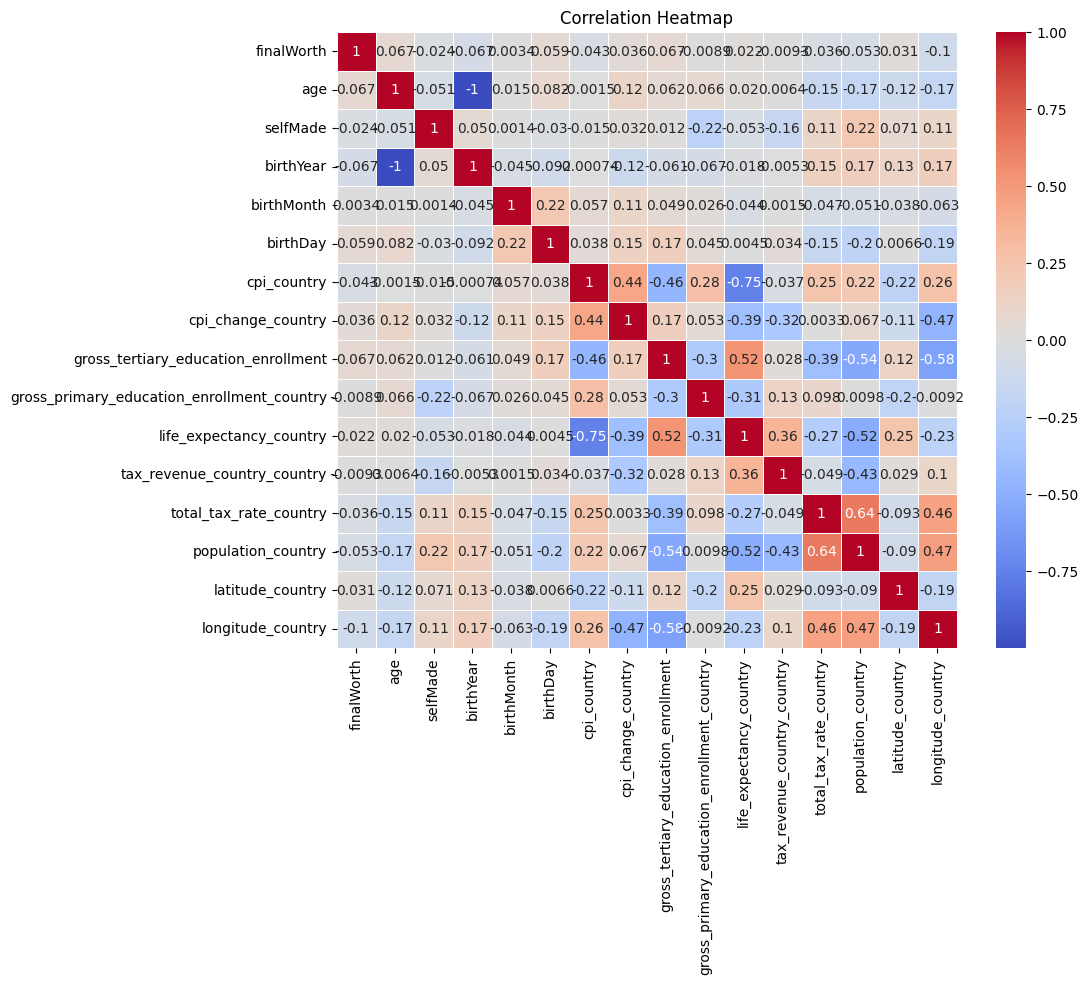

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

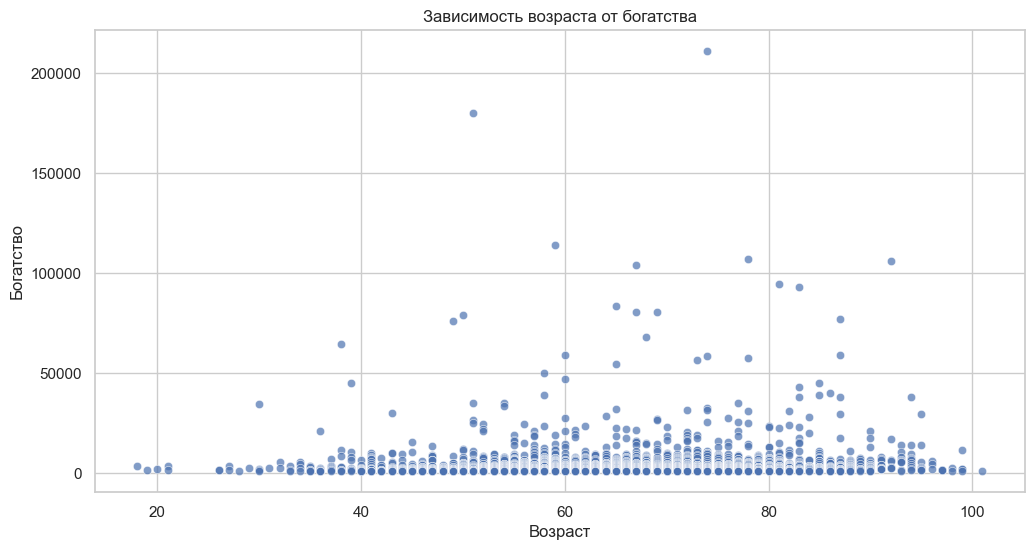

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.scatterplot(x='age', y='finalWorth', data=df, alpha=0.7)

plt.title('Зависимость возраста от богатства')
plt.xlabel('Возраст')
plt.ylabel('Богатство')

plt.show()

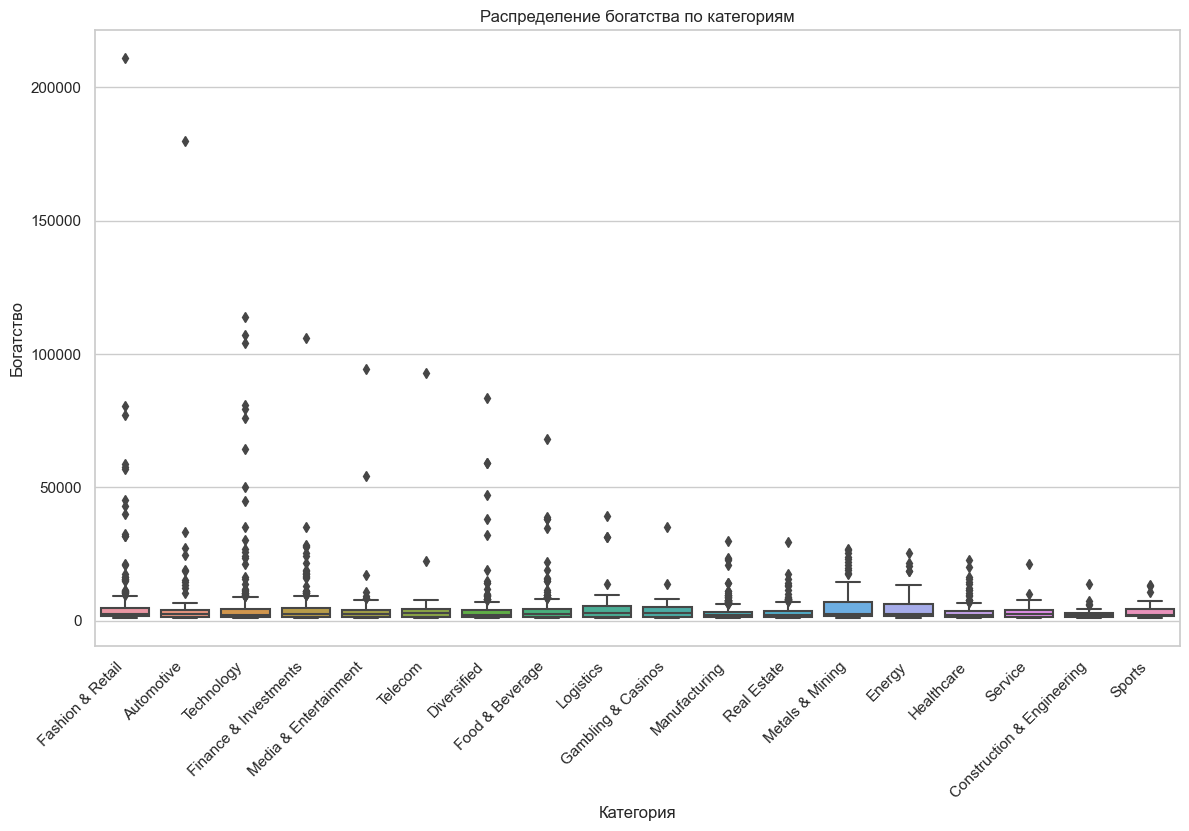

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.boxplot(x='category', y='finalWorth', data=df)

plt.xticks(rotation=45, ha='right')

plt.title('Распределение богатства по категориям')
plt.xlabel('Категория')
plt.ylabel('Богатство')

plt.show()

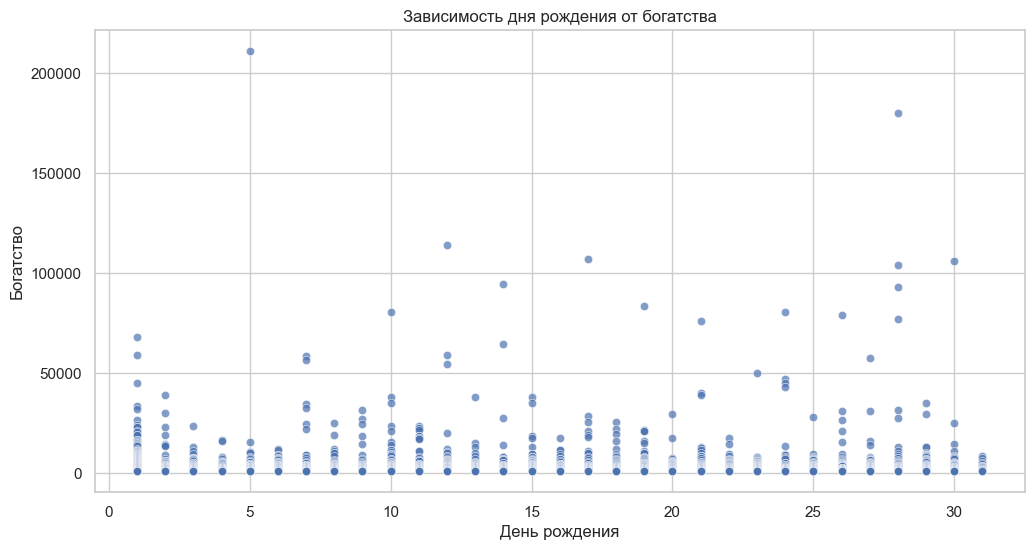

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.scatterplot(x='birthDay', y='finalWorth', data=df, alpha=0.7)

plt.title('Зависимость дня рождения от богатства')
plt.xlabel('День рождения')
plt.ylabel('Богатство')

plt.show()

In [5]:
for_drop = ['birthYear', 'birthMonth', 'birthDay', 'birthDate', 'lastName', 'firstName', 'date']
df = df.drop(for_drop, axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   finalWorth                                  2640 non-null   int64  
 1   category                                    2640 non-null   object 
 2   age                                         2575 non-null   float64
 3   country                                     2602 non-null   object 
 4   city                                        2568 non-null   object 
 5   source                                      2640 non-null   object 
 6   industries                                  2640 non-null   object 
 7   countryOfCitizenship                        2640 non-null   object 
 8   selfMade                                    2640 non-null   bool   
 9   status                                      2640 non-null   object 
 10  gender      

array([[<AxesSubplot: title={'center': 'finalWorth'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'cpi_country'}>],
       [<AxesSubplot: title={'center': 'cpi_change_country'}>,
        <AxesSubplot: title={'center': 'gross_tertiary_education_enrollment'}>,
        <AxesSubplot: title={'center': 'gross_primary_education_enrollment_country'}>],
       [<AxesSubplot: title={'center': 'life_expectancy_country'}>,
        <AxesSubplot: title={'center': 'tax_revenue_country_country'}>,
        <AxesSubplot: title={'center': 'total_tax_rate_country'}>],
       [<AxesSubplot: title={'center': 'population_country'}>,
        <AxesSubplot: title={'center': 'latitude_country'}>,
        <AxesSubplot: title={'center': 'longitude_country'}>]],
      dtype=object)

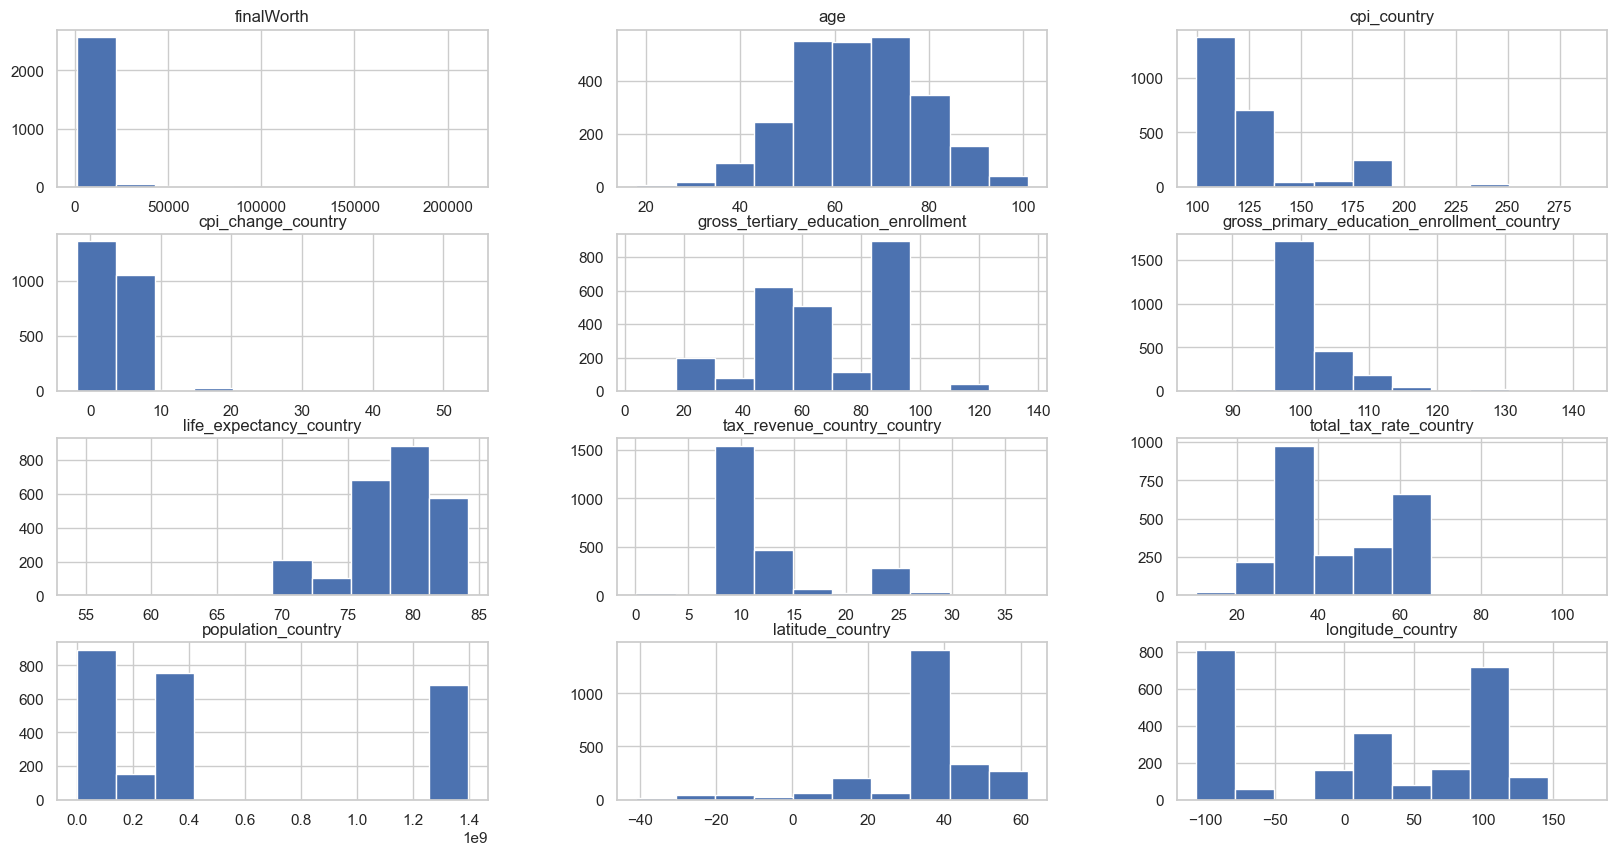

In [35]:
df.hist( bins=10, figsize=(20,10))

In [41]:
df.groupby('country').size().sort_values(ascending=False)

country
United States     754
China             523
India             157
Germany           102
United Kingdom     82
                 ... 
Liechtenstein       1
Luxembourg          1
Nepal               1
Portugal            1
Algeria             1
Length: 78, dtype: int64

In [42]:
df.groupby('gender').size()

gender
F     337
M    2303
dtype: int64

In [43]:
df.groupby('selfMade').size()

selfMade
False     828
True     1812
dtype: int64

In [44]:
df.groupby('status').size()

status
D                       1223
E                        268
N                        150
R                         65
Split Family Fortune      79
U                        855
dtype: int64

In [48]:
df.columns

Index(['finalWorth', 'category', 'age', 'country', 'city', 'source',
       'industries', 'countryOfCitizenship', 'selfMade', 'status', 'gender',
       'cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [6]:
categorical_columns = ['city','selfMade', 'category', 'country', 'source', 'industries', 'countryOfCitizenship', 'status', 'gender']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded['gdp_country'] = df_encoded['gdp_country'].replace('[\$,]', '', regex=True)

df_encoded['gdp_country'] = pd.to_numeric(df_encoded['gdp_country'], errors='coerce', downcast='integer')

print(df_encoded.head())

   finalWorth   age  cpi_country  cpi_change_country   gdp_country  \
0      211000  74.0       110.05                 1.1  2.715518e+12   
1      180000  51.0       117.24                 7.5  2.142770e+13   
2      114000  59.0       117.24                 7.5  2.142770e+13   
3      107000  78.0       117.24                 7.5  2.142770e+13   
4      106000  92.0       117.24                 7.5  2.142770e+13   

   gross_tertiary_education_enrollment  \
0                                 65.6   
1                                 88.2   
2                                 88.2   
3                                 88.2   
4                                 88.2   

   gross_primary_education_enrollment_country  life_expectancy_country  \
0                                       102.5                     82.5   
1                                       101.8                     78.5   
2                                       101.8                     78.5   
3                             

In [89]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Columns: 1852 entries, finalWorth to gender_M
dtypes: float64(12), int64(1), uint8(1839)
memory usage: 4.9 MB


In [7]:
target = 'finalWorth'
features = [col for col in df_encoded.columns if col != target]
X = df_encoded[features]
y = df_encoded[target]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающего набора:", x_train.shape)
print("Размер тестового набора:", x_test.shape)

Размер обучающего набора: (2112, 1851)
Размер тестового набора: (528, 1851)


In [ ]:
tpot.fit(x_train, y_train)

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

In [9]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE')

model.fit(x_train, y_train, verbose=100)

Learning rate set to 0.046077
0:	learn: 10686.6292466	total: 176ms	remaining: 2m 56s
100:	learn: 8365.5755093	total: 3.08s	remaining: 27.5s
200:	learn: 7026.6732108	total: 5.41s	remaining: 21.5s
300:	learn: 6124.1146735	total: 8.24s	remaining: 19.1s
400:	learn: 5560.3531281	total: 11s	remaining: 16.5s
500:	learn: 5162.3977687	total: 13.7s	remaining: 13.6s
600:	learn: 4827.8983703	total: 16.6s	remaining: 11s
700:	learn: 4565.8814552	total: 19.4s	remaining: 8.26s
800:	learn: 4330.1532570	total: 22.5s	remaining: 5.59s
900:	learn: 4078.1577528	total: 25.5s	remaining: 2.8s
999:	learn: 3839.5314793	total: 27.9s	remaining: 0us


In [15]:
from sklearn.metrics import mean_squared_error as mae

y_tr = model.predict(x_train)
y_val = model.predict(x_test)
 
print("Training RMSE: ", mae(y_train, y_tr))
print("Validation RMSE: ", mae(y_test, y_val))

Training RMSE:  14742001.980613763
Validation RMSE:  35486702.427339986
